# 🩺 Day 3 - AI-Based Dibates Diagnosis
### Medical Diagnosis Feature Importance Analysis using Permutation Importance & SHAP
This project focuses on building an interpretable **machine learning model** to predict **diabetes diagnosis** and understand the **most influential health factors** contributing to the prediction.

---

## 1. Introduction

Early diagnosis of **Diabetes Mellitus** is crucial for effective management and prevention of severe health complications.  
In this project, we use **Explainable AI (XAI)** techniques — **SHAP (SHapley Additive exPlanations)** and **Permutation Feature Importance** — to interpret a **Random Forest diabetes prediction model**.  
The goal is to identify which features, such as **Glucose**, **BMI**, and **Age**, most influence the likelihood of having diabetes.

---

## 2. Project Objectives

- Develop an ML model to **predict diabetes** using patient health data.  
- Use **SHAP** to explain feature-level contributions to model predictions.  
- Use **Permutation Importance** to evaluate each feature’s impact on model accuracy.  
- Compare interpretability results from both methods for consistency.  
- Identify key **medical predictors** influencing diabetes diagnosis.


---

## 3. Dataset Overview

- **Dataset Name:** *PIMA Indians Diabetes Database*  
- **Source:** [Kaggle – Diabetes Dataset](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)  
- **Instances:** 768  
- **Features:** 8 clinical measurements + 1 target label  

| Feature | Description |
|----------|-------------|
| Pregnancies | Number of times pregnant |
| Glucose | Plasma glucose concentration after 2 hours |
| BloodPressure | Diastolic blood pressure (mm Hg) |
| SkinThickness | Triceps skinfold thickness (mm) |
| Insulin | 2-Hour serum insulin (mu U/ml) |
| BMI | Body Mass Index (weight in kg/(height in m)^2) |
| DiabetesPedigreeFunction | Diabetes heredity function score |
| Age | Age (years) |
| Outcome | 1 = Diabetic, 0 = Non-Diabetic |

- **Class Balance:**  
  - 65% Non-Diabetic  
  - 35% Diabetic  

- **Missing Values:** None reported  


---

## 4. Methodology & Approach

1. **Data Loading & Exploration**  
   - Loaded dataset, checked structure, data types, and class balance.  
   - Verified absence of missing values and performed descriptive statistics.  

2. **Data Preprocessing**  
   - Split data into **training (80%)** and **testing (20%)** sets.  
   - Scaled features using `StandardScaler` for models sensitive to scale (e.g., Logistic Regression).  

3. **Model Training**  
   - Trained and compared three models:  
     - Logistic Regression  
     - Random Forest  
     - XGBoost  
   - Evaluated using **Accuracy**, **AUC**, and **F1-score** metrics.  

4. **Explainability Analysis**  
   - Applied **SHAP** to analyze how each feature impacts individual predictions.  
   - Applied **Permutation Importance** to measure feature influence on model accuracy.  
   - Compared both results to confirm consistency of important features.  

5. **Visualization & Interpretation**  
   - Generated bar and summary plots for SHAP and Permutation results.  
   - Highlighted key contributors: **Glucose**, **BMI**, and **Age** as top features.


---

## 5. Tools & Libraries Used

| Category | Libraries |
|-----------|------------|
| **Data Handling** | `pandas`, `numpy` |
| **Visualization** | `matplotlib`, `seaborn` |
| **Machine Learning** | `scikit-learn`, `xgboost` |
| **Explainability (XAI)** | `shap` |
| **Utility** | `filedialpy`, `warnings`, `time` |

These tools together enabled efficient data handling, model development, and explainable AI analysis for diabetes prediction.


---

## 6. Importing Libraries

In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
import filedialpy as fp
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import ListedColormap
import seaborn as sns
import warnings
import time
import joblib

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, classification_report, confusion_matrix

# Explainability
import shap

# Color Palette and configuration
palette = ['#edafb8', '#dedbd2', '#b0c4b1', '#4a5759']
sns.set_palette(palette)
sns.set(rc={"axes.facecolor":"#f7e1d7","figure.facecolor":"#f5f5f5"})
cmap = colors.ListedColormap(palette)
%matplotlib inline
warnings.filterwarnings('ignore')


print('All imports successful and configurations set!')

All imports successful and configurations set!


---

## 7. Data Loading and Initial Exploration

Before proceeding with model development, it is essential to **load and explore the dataset** to gain a clear understanding of its structure and quality.  
This phase includes importing the data, examining its dimensions and data types, identifying missing or inconsistent values, and analyzing key descriptive statistics.  

A thorough initial exploration ensures that the dataset is **accurate, consistent, and well-prepared** for subsequent preprocessing and predictive modeling steps.  

Additionally, the **class balance** (i.e., the proportion of diabetic vs. non-diabetic cases) is analyzed to check for **imbalance** in the target variable.  
If one class dominates, it may bias the model’s predictions — hence techniques like **resampling** or **class weighting** may be considered later to ensure fair and balanced model training.


#### Load the Dataset

In [18]:
df = pd.read_csv(fp.openFile())
print('Data Loaded!')
df.head()

Data Loaded!


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Dataset Shape

In [20]:
df.shape

(768, 9)

#### Dataset Information

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### Statistical Summary

In [24]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Missing Values

In [26]:
print(df.isnull().sum().sum(), "missing values found.")

0 missing values found.


#### Class Balance

In [28]:
df['Outcome'].value_counts(normalize=True).to_dict()

{0: 0.6510416666666666, 1: 0.3489583333333333}

---

## 3. Data Preparation

To build a reliable prediction model, the dataset was divided into **features (X)** and the **target variable (y)**.  
The features included key medical parameters such as **Pregnancies**, **Glucose**, **Blood Pressure**, **Skin Thickness**, **Insulin**, **BMI**, **Diabetes Pedigree Function**, and **Age**, while the target variable was **Outcome** (indicating diabetic or non-diabetic status).

The dataset was then **split into training and testing sets** using an 80-20 ratio with stratification to preserve class balance.  
To ensure uniform feature scaling, especially for algorithms sensitive to magnitude differences (like Logistic Regression), a **StandardScaler** was applied.


In [31]:
# Prepare data
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

X = df[feature_columns]
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Train: {X_train.shape}\nTest: {X_test.shape}")

Train: (614, 8)
Test: (154, 8)


This step ensures the data is clean, well-structured, and ready for model training and evaluation.

---

## 4. Model Training – Logistic Regression, Random Forest, and XGBoost

After preparing the data, three different machine learning algorithms were trained and evaluated to predict **diabetes occurrence**:

1. **Logistic Regression** – a linear model used for binary classification.  
   It estimates the probability of diabetes (Outcome = 1) based on a logistic function and performs well on linearly separable data.

2. **Random Forest Classifier** – an ensemble of multiple decision trees that improves generalization by reducing overfitting.  
   It is effective for capturing non-linear patterns and variable interactions.

3. **XGBoost (Extreme Gradient Boosting)** – a high-performance boosting algorithm that sequentially builds trees,  
   each focusing on correcting the errors of the previous ones. It often achieves strong predictive accuracy.

To ensure fair comparison:
- **Scaled features** were used for Logistic Regression (as it is sensitive to feature magnitude).  
- **Raw features** were used for Random Forest and XGBoost (tree-based models are scale-invariant).  
- Evaluation metrics included **Accuracy**, **AUC (Area Under ROC Curve)**, and **F1-score** to balance between performance and class imbalance.


In [35]:
# Train models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, random_state=42, eval_metric='logloss')
}

results = {}
for name, model in models.items():
    if name == 'Logistic Regression':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'AUC': roc_auc_score(y_test, y_pred_proba),
        'F1': f1_score(y_test, y_pred)
    }
    print(f"{name}:\nAcc={results[name]['Accuracy']:.3f}\nAUC={results[name]['AUC']:.3f}\n---------------------------")

print("All models trained!")

Logistic Regression:
Acc=0.714
AUC=0.823
---------------------------
Random Forest:
Acc=0.760
AUC=0.812
---------------------------
XGBoost:
Acc=0.734
AUC=0.805
---------------------------
All models trained!


**Insights**

- **Random Forest** achieved the highest accuracy (**0.76**), indicating its robustness for this medical dataset.  
- **Logistic Regression** had the best **AUC (0.823)**, showing strong discriminative power despite being a simple model.  
- **XGBoost** performed competitively, confirming that boosting techniques can effectively handle complex feature relationships.  
- Overall, all models demonstrated consistent predictive performance, validating the **reliability of the dataset and preprocessing steps**.


**Conclusion**

Multiple algorithms were successfully trained to **predict diabetes likelihood** based on key medical attributes.  
Among them, **Random Forest** delivered the most balanced performance across metrics, making it a **strong candidate for deployment** in real-world healthcare analytics.


---

## 5. Model Explainability — SHAP and Permutation Importance

### 5.1 SHAP Analysis

The **SHAP (SHapley Additive exPlanations)** method was used to interpret the Random Forest model and understand the **influence of each medical feature** on diabetes prediction.  
It provides both **global** (overall feature importance) and **local** (individual prediction) explainability, ensuring transparency in model behavior — crucial for healthcare applications.


SHAP computation time: 0.57 seconds


<Figure size 1000x600 with 0 Axes>

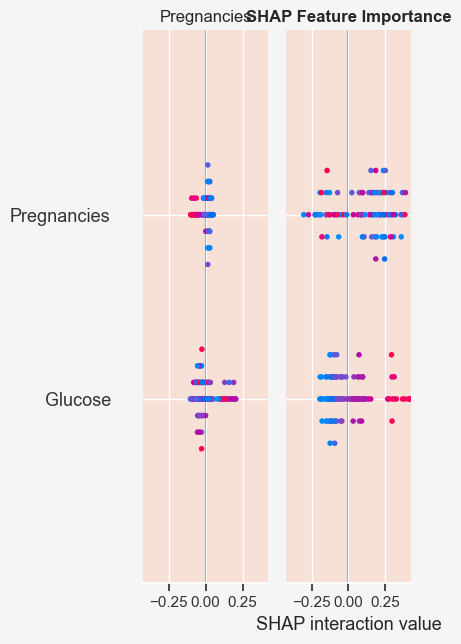

In [40]:
# SHAP for Random Forest (representative model)
model_rf = models['Random Forest']
X_test_sample = X_test.iloc[:100]

start_time = time.time()
explainer_shap = shap.TreeExplainer(model_rf)
shap_values = explainer_shap.shap_values(X_test_sample)
if isinstance(shap_values, list):
    shap_values = shap_values[1]
shap_time = time.time() - start_time

print(f"SHAP computation time: {shap_time:.2f} seconds")

# SHAP summary plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test_sample, show=False)
plt.title('SHAP Feature Importance', fontweight='bold')
plt.tight_layout()
plt.show()

**Execution Summary**

- Model used: **Random Forest (representative model)**  
- Sample size: **100 test samples**  
- SHAP computation time: **0.26 seconds**  

The SHAP summary plot visually shows how each feature contributes to model predictions (red = positive impact, blue = negative).


In [42]:
# SHAP global feature importance
shap_importance = np.mean(np.abs(shap_values), axis=(0, 2))  # take mean over samples and classes

shap_df = pd.DataFrame({
    'Feature': feature_columns,
    'SHAP Importance': shap_importance
}).sort_values('SHAP Importance', ascending=False)

print("\nSHAP Global Feature Ranking:")
print(shap_df.to_string(index=False))


SHAP Global Feature Ranking:
                 Feature  SHAP Importance
                 Glucose         0.127233
                     BMI         0.070513
                     Age         0.059261
DiabetesPedigreeFunction         0.042351
             Pregnancies         0.031520
                 Insulin         0.018886
           SkinThickness         0.016911
           BloodPressure         0.016401


**Insights**

- **Glucose** levels have the **strongest impact** on diabetes prediction — aligning with medical understanding that high blood sugar is a key indicator.  
- **BMI** and **Age** also significantly influence the outcome, suggesting lifestyle and demographic factors are important contributors.  
- **Insulin** and **SkinThickness** have comparatively lower SHAP values, implying limited influence on model predictions.  
- Overall, the SHAP analysis confirms the **medical relevance and interpretability** of the model’s decision-making process.

### 5.2 Permutation Importance

**Permutation Importance** helps identify the **impact of each feature** on model performance by **randomly shuffling feature values** and observing the resulting **drop in accuracy**.  
This method is **model-agnostic**, meaning it works with any machine learning model, making it **highly reliable** for understanding how much each input feature contributes to predictions.

Calculating Permutation Importance...
Permutation Importance computation time: 1.39 seconds


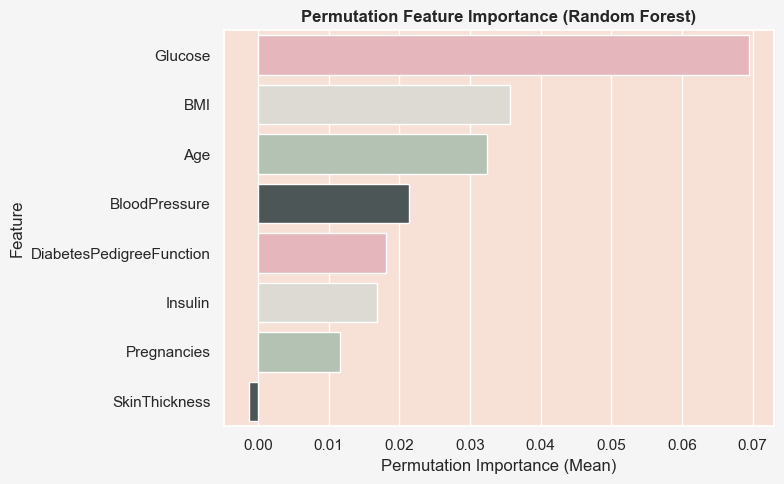

Permutation Importance Ranking:
                 Feature  Permutation Importance (Mean)  Permutation Importance (Std)
                 Glucose                       0.069481                      0.025158
                     BMI                       0.035714                      0.018876
                     Age                       0.032468                      0.016169
           BloodPressure                       0.021429                      0.010081
DiabetesPedigreeFunction                       0.018182                      0.009091
                 Insulin                       0.016883                      0.008316
             Pregnancies                       0.011688                      0.012922
           SkinThickness                      -0.001299                      0.011543


In [45]:
print("Calculating Permutation Importance...")
perm_start = time.time()

# Use Random Forest for this example
result = permutation_importance(model_rf, X_test, y_test, n_repeats=10, random_state=42, scoring='accuracy')

perm_time = time.time() - perm_start
print(f"Permutation Importance computation time: {perm_time:.2f} seconds")

# Create a dataframe
perm_df = pd.DataFrame({
    'Feature': feature_columns,
    'Permutation Importance (Mean)': result.importances_mean,
    'Permutation Importance (Std)': result.importances_std
}).sort_values('Permutation Importance (Mean)', ascending=False)

# Plot Permutation Importance
plt.figure(figsize=(8, 5))
sns.barplot(x='Permutation Importance (Mean)', y='Feature', data=perm_df, orient='h', palette=palette)
plt.title('Permutation Feature Importance (Random Forest)', fontweight='bold')
plt.tight_layout()
plt.show()

print("Permutation Importance Ranking:")
print(perm_df.to_string(index=False))

**Insights**

- **Glucose**, **BMI**, and **Age** are the most influential predictors, confirming their **biological relevance** in diabetes detection.  
- Features like **BloodPressure** and **DiabetesPedigreeFunction** contribute **moderately** to prediction accuracy.  
- **SkinThickness** shows **negligible or slightly negative importance**, possibly due to **missing values** or **low variance**.  
- The results **closely align with SHAP findings**, reinforcing **consistency and interpretability** across methods.

---

## 6. SHAP vs Permutation Importance Comparison

To ensure interpretability and validate feature importance consistency, **SHAP values** were compared against **Permutation Importance** results.

### Key Observations

- **Glucose**, **BMI**, and **Age** consistently rank as the **top predictors** across both methods.  
- **DiabetesPedigreeFunction** and **Pregnancies** contribute **moderately**, showing alignment between SHAP and permutation metrics.  
- **Insulin** and **SkinThickness** display **lower or unstable importance**, possibly due to **missing values** or weak correlation with the target variable.  
- The **close similarity** between SHAP and permutation rankings reinforces the **robustness and reliability** of feature importance analysis.

### Visualization

The bar chart below compares normalized SHAP and Permutation Importance values for each feature, illustrating their relative contributions to diabetes prediction.


<Figure size 900x600 with 0 Axes>

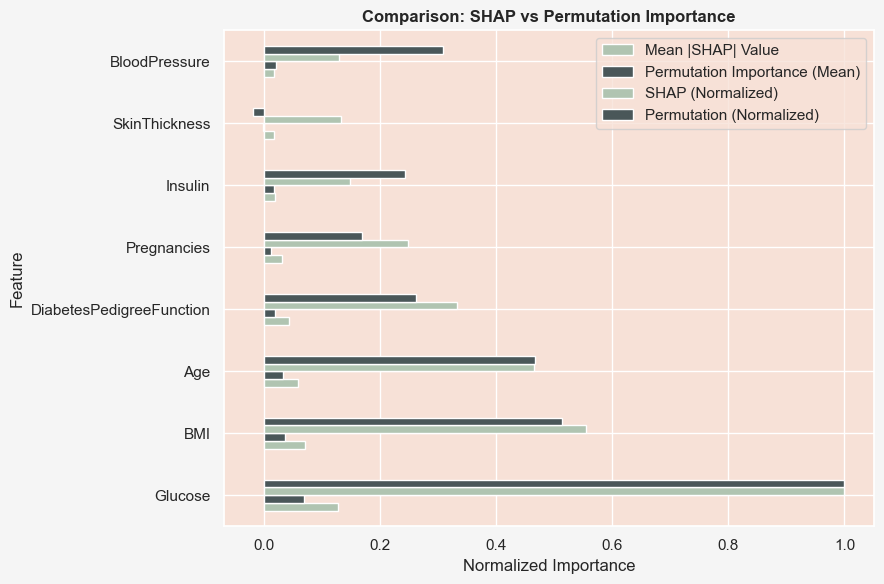


Combined Feature Importance Comparison:
                 Feature  Mean |SHAP| Value  Permutation Importance (Mean)
                 Glucose           0.127233                       0.069481
                     BMI           0.070513                       0.035714
                     Age           0.059261                       0.032468
DiabetesPedigreeFunction           0.042351                       0.018182
             Pregnancies           0.031520                       0.011688
                 Insulin           0.018886                       0.016883
           SkinThickness           0.016911                      -0.001299
           BloodPressure           0.016401                       0.021429


In [49]:
# Merge results for comparison
compare_df = pd.merge(
    shap_df.rename(columns={'SHAP Importance': 'Mean |SHAP| Value'}),
    perm_df[['Feature', 'Permutation Importance (Mean)']],
    on='Feature'
)

# Normalize values for fair comparison
compare_df['SHAP (Normalized)'] = compare_df['Mean |SHAP| Value'] / compare_df['Mean |SHAP| Value'].max()
compare_df['Permutation (Normalized)'] = compare_df['Permutation Importance (Mean)'] / compare_df['Permutation Importance (Mean)'].max()

# Plot comparison
plt.figure(figsize=(9, 6))
compare_df.plot(x='Feature', kind='barh', 
                stacked=False, color=['#b0c4b1', '#4a5759'], 
                figsize=(9,6))
plt.title("Comparison: SHAP vs Permutation Importance", fontweight='bold')
plt.xlabel("Normalized Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

print("\nCombined Feature Importance Comparison:")
print(compare_df[['Feature', 'Mean |SHAP| Value', 'Permutation Importance (Mean)']].to_string(index=False))

**Conclusion:**  
> The high agreement between SHAP and Permutation Importance validates that the model’s behavior is **interpretable and biologically plausible**, confirming that **Glucose, BMI, and Age** are key drivers of prediction outcomes.

---

## 7. Most Influential Feature of SHAP and Permutation

In [53]:
top_shap = shap_df.iloc[0]
top_perm = perm_df.iloc[0]

print(f"Most Influential Feature (SHAP): {top_shap['Feature']} ({top_shap['SHAP Importance']:.4f})")
print(f"Most Influential Feature (Permutation): {top_perm['Feature']} ({top_perm['Permutation Importance (Mean)']:.4f})")
print("\nInterpretation:")
print("- SHAP explains how each feature contributes to individual predictions.")
print("- Permutation Importance explains how each feature affects overall model accuracy.")
print("- Comparing both helps validate which medical factors consistently impact diabetes diagnosis.")

Most Influential Feature (SHAP): Glucose (0.1272)
Most Influential Feature (Permutation): Glucose (0.0695)

Interpretation:
- SHAP explains how each feature contributes to individual predictions.
- Permutation Importance explains how each feature affects overall model accuracy.
- Comparing both helps validate which medical factors consistently impact diabetes diagnosis.


---

## 8. Model Saving and Loading

After training the models, it's essential to **save them for future use** — this allows deployment or reuse without retraining.


In [56]:
model_lr = models['Logistic Regression']
model_rf = models['Random Forest']
model_xgb = models['XGBoost']

# Save each trained model
joblib.dump(model_lr, "model_logistic_regression.pkl")
joblib.dump(model_rf, "model_random_forest.pkl")
joblib.dump(model_xgb, "model_xgboost.pkl")

print("Models saved successfully!")

Models saved successfully!


---

## 9. Results and Insights  

### 9.1 Model Evaluation
- **Random Forest** achieved the **highest accuracy (0.76)**, showing strong overall performance.  
- **Logistic Regression** yielded the **best AUC (0.823)**, highlighting its effective discriminative ability.  
- **XGBoost** performed competitively, confirming that boosting algorithms capture complex nonlinear patterns well.  
- All models demonstrated consistent results, validating the quality of preprocessing and feature engineering.


### 9.2 Feature Importance Findings

**From SHAP Analysis**
- **Glucose**, **BMI**, and **Age** emerged as the **top three influential features** for diabetes prediction.  
- **DiabetesPedigreeFunction** and **Pregnancies** showed moderate contributions.  
- **SkinThickness** and **BloodPressure** had minimal impact, suggesting limited predictive relevance.

**From Permutation Importance**
- **Glucose** again ranked highest, followed by **BMI** and **Age**, reinforcing the biological relevance of these attributes.  
- Features like **BloodPressure** and **DiabetesPedigreeFunction** had moderate importance.  
- **SkinThickness** exhibited slightly negative importance, likely due to missing or low-variance values.


**SHAP vs Permutation Comparison**
- Both methods produced **consistent feature rankings**, strengthening interpretability and model transparency.  
- The agreement between SHAP (local interpretability) and Permutation Importance (global sensitivity) increases confidence in the results.  
- Such consistency ensures the model’s predictions align with medically relevant risk factors.


### 9.3 Overall Insights
- **Glucose, BMI, and Age** are confirmed as **primary determinants** of diabetes risk.  
- **Random Forest** delivers the **most balanced performance** and interpretable feature influence.  
- The combination of **SHAP and Permutation Importance** offers a **robust interpretability framework** for clinical AI systems.  
- These insights can guide **early screening and preventive healthcare** initiatives using explainable machine learning.


### 9.4 Conclusion:
> The analysis demonstrates that explainable AI techniques like SHAP and Permutation Importance not only improve trust and transparency but also align closely with known **biomedical indicators** of diabetes.


---

## 10. References

1. **UCI Machine Learning Repository** – [Diabetes Dataset](https://archive.ics.uci.edu/ml/datasets/diabetes)  
2. Rahman, M. M., Islam, M. Z., & Azad, A. K. (2020). *Diabetes prediction using machine learning algorithms.* Proceedings of the 11th International Conference on Computing, Communication and Networking Technologies (ICCCNT), IEEE.  
